In [14]:
from shapely.geometry import Point, Polygon
from matplotlib import pyplot as plt
from math import sin, cos, sqrt, atan2, radians

import shapely
import pickle
import random
import numpy as np
import gmaps, os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from ipywidgets.embed import embed_minimal_html
import webbrowser
# The functions of Geoguessr class are loaded 
# from the geoLSTM.py file
import geoLSTM

# directory containing data
DATADIR = "infoExtraction/data"
DATACOMBINED = DATADIR + "/dataCombinedSamples/"
POLYDIR = "infoExtraction" 
# directory to store model in
MODELDIR = "models"

# Directory structure to use on Colab
# UNCOMMENT FOR COLAB:

# !pip install gmaps
# DATADIR = '/content/drive/My Drive/geoguessrLSTM'
# POLYDIR = '/content/drive/My Drive/geoguessrLSTM'
# DATACOMBINED = DATADIR + "/dataCombined/"
# MODELDIR = '/content/drive/My Drive/geoguessrLSTM/models'
# import sys
# sys.path.append(DATADIR)
# import geoLSTM

In [15]:
# load training image file names
TF = np.load(DATADIR + '/trainSampleFile.npy')
# load testing image file names
TESF = np.load(DATADIR +'/testSampleFile.npy')
print("Train files: {}, Test files: {}".format(len(TF), len(TESF)))

Train files: 12, Test files: 3


56


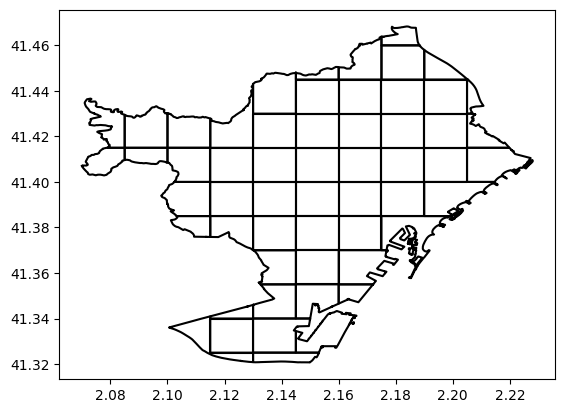

In [16]:
# load split grid file
BcnPolyGrid = pickle.load(open(POLYDIR + "/BcnPolyGrid.pkl",'rb'))
for i in BcnPolyGrid.values():
    plt.plot(i[:,1],i[:,0], color='black')
print(len(BcnPolyGrid))

In [17]:
geoModel = geoLSTM.Geoguessr(useRestnet=False)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_1 (TimeDi  (None, 3, 512)            2994048   
 stributed)                                                      
                                                                 
 lstm_1 (LSTM)               (None, 64)                147712    
                                                                 
 dense_5 (Dense)             (None, 1024)              66560     
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                      

Getting data from directory: infoExtraction/data/dataCombinedSamples/
Read 4 points. Training now
Epoch 1/2
4/4 [==============================] - 16s 4s/step - loss: 4.0498 - categorical_accuracy: 0.0000e+00
Epoch 2/2
4/4 [==============================] - 15s 4s/step - loss: 4.0783 - categorical_accuracy: 0.0000e+00
Training sucessfull!!

Saving model 0 with loss 4.078 at models
Read 4 points. Training now
Epoch 1/2


/Users/Corcho/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 15s 4s/step - loss: 3.8926 - categorical_accuracy: 0.2500
Epoch 2/2
4/4 [==============================] - 16s 4s/step - loss: 3.9292 - categorical_accuracy: 0.2500
Training sucessfull!!

Saving model 1 with loss 3.929 at models
Read 4 points. Training now
Epoch 1/2
4/4 [==============================] - 16s 4s/step - loss: 4.0653 - categorical_accuracy: 0.0000e+00
Epoch 2/2
4/4 [==============================] - 16s 4s/step - loss: 4.0459 - categorical_accuracy: 0.0000e+00
Training sucessfull!!

Saving model 2 with loss 4.046 at models


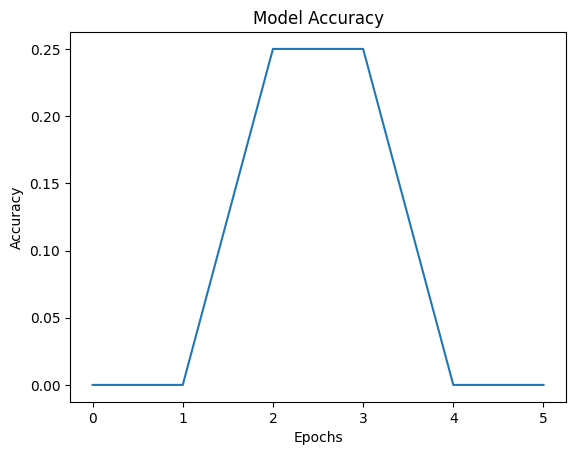

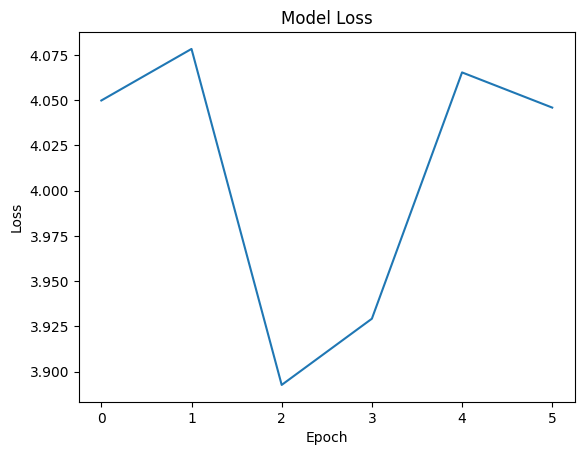

In [18]:
geoModel.fit(TF, DATACOMBINED, 
      saveFolder=MODELDIR, 
      batchSize=4, 
      epochs=2,  
      plot=True)

In [19]:
modelName = '/model_4.075_2.h5'
geoModel = geoLSTM.Geoguessr.load(MODELDIR + modelName)

Loading model from models/model_4.075_2.h5


Loaded model loss 4.075
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 3, 512)            2994048   
 ributed)                                                        
                                                                 
 lstm (LSTM)                 (None, 64)                147712    
                                                                 
 dense (Dense)               (None, 1024)              66560     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                              

1/1 [==============================] - 1s 965ms/step


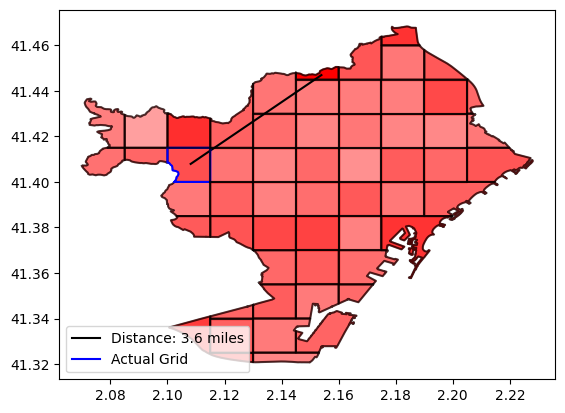

AttributeError: module 'collections' has no attribute 'Iterable'

In [20]:
geoModel.predictSingle(TESF[0], DATACOMBINED, ployGrid=BcnPolyGrid)

In [21]:
geoModel.evaluate(TESF, DATACOMBINED, BcnPolyGrid)

1/1 [==============================] - 1s 700ms/step
Evaluated 0 out of 3 points
1/1 [==============================] - 1s 696ms/step


3.8398786247743666